In [1]:
## ROC and AUC
## AUC -  Area Under the curve
## ROC -  Reciever Operating Characteristic curve - Shows a graph of performance of the classification model for all classification threshold

In [2]:
# AUC should be greater than imaginary slope 1 line i.e. straight line passing through 0,0 and 1,1
# Actual thresold depends on the domain and importance of True positive rate and False positive rate 
# The curve is plot between True Positive Rate and False Positive Rate

In [10]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification # create some random dataset
from sklearn.model_selection import train_test_split


In [11]:
# Creating the dataset
# Spliting the dataset into X and Y
X, Y = make_classification(n_samples = 2000, n_classes = 2, weights = [1,1], random_state = 1)
# n_samples = number of records
# n_classes = o/p categories, 2 - binary 
# weights = balancing of the dataset [1,1] = balanced

In [12]:
X.shape

(2000, 20)

In [13]:
Y.shape

(2000,)

In [14]:
# Creating train and test datasets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [17]:
## Random Forests
# Applying Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Building the model
rf_model = RandomForestClassifier()
rf_model.fit(Xtrain, Ytrain)

# predicting the output probabilities 
Xtrain_pred = rf_model.predict_proba(Xtrain)
print('Random Forest Train rco-auc: {}'.format(roc_auc_score(Ytrain, Xtrain_pred[:, 1]))) # Picking the prob for 0 
Xtest_pred = rf_model.predict_proba(Xtest)
print('Random Forest Test roc-auc: {}'.format(roc_auc_score(Ytest, Xtest_pred[:, 1])))

Random Forest Train rco-auc: 1.0
Random Forest Test roc-auc: 0.981388888888889


In [19]:
## Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier 

# Building the model
adb_model = AdaBoostClassifier()
adb_model.fit(Xtrain, Ytrain)

# Predicting the o/p probabilites
Xtrain_pred_2 = adb_model.predict_proba(Xtrain)
print('Ada Boost Train rco-auc: {}'.format(roc_auc_score(Ytrain, Xtrain_pred_2[:, 1])))

Xtest_pred_2 = adb_model.predict_proba(Xtest)
print('Ada Boost Test rco-auc: {}'.format(roc_auc_score(Ytest, Xtest_pred_2[:, 1])))


Ada Boost Train rco-auc: 0.9975081174960356
Ada Boost Test rco-auc: 0.9826111111111111


In [20]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Building the model
dc_model = DecisionTreeClassifier()
dc_model.fit(Xtrain, Ytrain)

# Predicting o/p probabilites 
Xtrain_pred_3 = dc_model.predict_proba(Xtrain)
print('Decision Tree Train rco-auc: {}'.format(roc_auc_score(Ytrain, Xtrain_pred_3[:, 1])))

Xtest_pred_3 = dc_model.predict_proba(Xtest)
print('Decision Tree Test rco-auc: {}'.format(roc_auc_score(Ytest, Xtest_pred_3[:, 1])))

Ada Boost Train rco-auc: 1.0
Ada Boost Test rco-auc: 0.9083333333333333


In [24]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

# Building the model
log_model = LogisticRegression()
log_model.fit(Xtrain, Ytrain)

# Predicting output probabilites
Xtrain_pred_4 = log_model.predict_proba(Xtrain)
print('Logistic Regression Train rco-auc: {}'.format(roc_auc_score(Ytrain, Xtrain_pred_4[:, 1])))

Xtest_pred_4 = log_model.predict_proba(Xtest)
print('Logistic Regression Test rco-auc: {}'.format(roc_auc_score(Ytest, Xtest_pred_4[:, 1])))

Logistic Regression Train rco-auc: 0.9863568922694498
Logistic Regression Test rco-auc: 0.9885777777777777


In [25]:
## Selecting Threshold values for maximum accuracy 

In [29]:
# Extraing the results into a new list
pred = []

for model in [rf_model, adb_model, dc_model, log_model]:
    pred.append(pd.Series(model.predict_proba(Xtest)[:, 1]))
    
pred

[0      0.99
 1      0.02
 2      0.98
 3      0.93
 4      0.55
        ... 
 595    0.01
 596    0.03
 597    0.97
 598    0.01
 599    0.99
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      1.0
 3      1.0
 4      0.0
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.0
 599    1.0
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64]

In [30]:
# Calculating mean for the predicted values
final_predict = pd.concat(pred, axis = 1).mean(axis = 1) # Mean for each row/ record based on the 4 models

print('Ensemble test ROC-AUC: {}'.format(roc_auc_score(Ytest, final_predict)))

Ensemble test ROC-AUC: 0.9848777777777779


In [31]:
pd.concat(pred, axis =1)

,0,1,2,3
0,0.99,0.559186,1.0,0.991861
1,0.02,0.463282,0.0,0.000008
2,0.98,0.538202,1.0,0.966929
3,0.93,0.509875,1.0,0.761539
4,0.55,0.490344,0.0,0.779443
...,...,...,...,...
595,0.01,0.461121,0.0,0.024239
596,0.03,0.441377,0.0,0.000003
597,0.97,0.532403,1.0,0.984385
598,0.01,0.441720,0.0,0.001147


In [32]:
final_predict

0      0.885262
1      0.120823
2      0.871283
3      0.800353
4      0.454947
         ...   
595    0.123840
596    0.117845
597    0.871697
598    0.113217
599    0.884857
Length: 600, dtype: float64

In [33]:
## Calculating the ROC Curve

fpr, tpr, threshold = roc_curve(Ytest, final_predict)


In [34]:
threshold

array([1.91251213, 0.91251213, 0.8985034 , 0.89827475, 0.84699934,
       0.84662833, 0.83597738, 0.83571156, 0.81320853, 0.81287124,
       0.80489742, 0.80393711, 0.80035339, 0.7980558 , 0.76897732,
       0.76743537, 0.75896627, 0.72887362, 0.69838469, 0.69719563,
       0.6846569 , 0.63557343, 0.61386405, 0.61377948, 0.60096497,
       0.56670009, 0.56235188, 0.55590767, 0.55498136, 0.55222765,
       0.5396034 , 0.53786956, 0.48615858, 0.48544916, 0.48351868,
       0.47264281, 0.45494674, 0.40166474, 0.3915152 , 0.38300386,
       0.38105932, 0.37246755, 0.33845371, 0.33184818, 0.30450602,
       0.27591982, 0.23146893, 0.20618663, 0.20240225, 0.19733682,
       0.19640421, 0.19547016, 0.19336612, 0.14469741, 0.14348417,
       0.12033548, 0.1203351 , 0.10498954])

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.00666667, 0.00666667, 0.01      , 0.01      , 0.01333333,
       0.01333333, 0.01666667, 0.01666667, 0.02      , 0.02      ,
       0.02333333, 0.02333333, 0.02666667, 0.02666667, 0.03      ,
       0.03      , 0.03666667, 0.03666667, 0.04      , 0.04      ,
       0.05      , 0.05      , 0.05333333, 0.05333333, 0.05666667,
       0.05666667, 0.06      , 0.06      , 0.06333333, 0.06333333,
       0.06666667, 0.06666667, 0.08      , 0.08      , 0.08333333,
       0.08333333, 0.09      , 0.09      , 0.09333333, 0.09333333,
       0.10333333, 0.10333333, 0.12333333, 0.12333333, 0.13      ,
       0.13      , 0.13333333, 0.13333333, 0.25333333, 0.25333333,
       0.61333333, 0.61333333, 1.        ])

In [36]:
tpr

array([0.        , 0.00333333, 0.07333333, 0.07333333, 0.67      ,
       0.67      , 0.73666667, 0.73666667, 0.8       , 0.8       ,
       0.81      , 0.81      , 0.81333333, 0.81333333, 0.86      ,
       0.86      , 0.87333333, 0.87333333, 0.88666667, 0.88666667,
       0.89333333, 0.89333333, 0.90333333, 0.90333333, 0.90666667,
       0.90666667, 0.91333333, 0.91333333, 0.91666667, 0.91666667,
       0.92333333, 0.92333333, 0.94333333, 0.94333333, 0.94666667,
       0.94666667, 0.95666667, 0.95666667, 0.96      , 0.96      ,
       0.96333333, 0.96333333, 0.97      , 0.97      , 0.98      ,
       0.98      , 0.98333333, 0.98333333, 0.98666667, 0.98666667,
       0.99      , 0.99      , 0.99333333, 0.99333333, 0.99666667,
       0.99666667, 1.        , 1.        ])

In [40]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score

acc = []
for th in threshold:
    y_pred = np.where(final_predict > th, 1,0)
    acc.append(accuracy_score(Ytest, y_pred, normalize = True))
    
acc = pd.concat([pd.Series(threshold), pd.Series(acc)], axis = 1)

acc.columns = ['Threshold', 'Accuracy']
acc.sort_values(by = 'Accuracy', ascending = False, inplace = True)
acc.head()

,Threshold,Accuracy
36,0.454947,0.943333
33,0.485449,0.941667
44,0.304506,0.941667
35,0.472643,0.941667
45,0.275920,0.940000


In [49]:
## Ploting the ROC-AUC curve

def plot_roc_auc(fpr, tpr):
    plt.plot(fpr, tpr, color = "red", label = 'ROC')
    plt.plot([0,1], [0,1], color = "black", linestyle = '--')
    plt.xlabel(' False Positive Rate')
    plt.ylabel(' True Positive Rate')
    plt.title(' Receiver Operating Characterisitcs (ROC) Curve')
    plt.legend()
    plt.show()

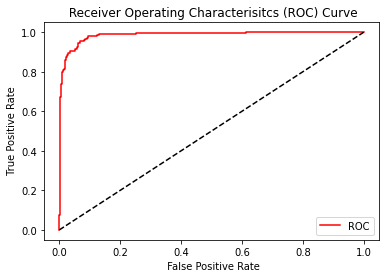

In [50]:
plot_roc_auc(fpr, tpr)